# Monte Carlo Simulation.
## *What is Monte Carlo Simulation?*
At it's core, a Monte Carlo simulation is a mathematical technique used to estimate the possible outcomes of an uncertain event.

> *[It is a way to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables.](http://www.investopedia.com/terms/m/montecarlosimulation.asp#:~:text=A%20Monte%20Carlo%20simulation%20is%20a%20way%20to%20model%20the%20probability%20of%20different%20outcomes%20in%20a%20process%20that%20cannot%20easily%20be%20predicted%20due%20to%20the%20intervention%20of%20random%20variables.)*

Because the world is full of variables we can't predict (like the stock market, weather, or project timelines), this method uses **probability distributions** to build a model of possible outcomes. It is also referred to as a multiple probability simulation.

## *How it Works (The 4-Step Process)*

1. **Define the Model**: Identify the mathematical formula that describes your problem.
2. **Specify Variables**: Instead of using fixed numbers (like "the project will take 10 days"), you assign a range of values (like "the project usually takes 10 days, but could take 8 or 15").
3. **Run Iterations**: A computer runs the calculation thousands (or millions) of times, each time picking a random value for the uncertain variables.
4. **Analyze the Results**: You look at the "bell curve" of results to see the most likely outcome and the risks of extreme cases.

## Case Study 1. Estimating Odds of a Business Venture Succeeding.

### 1. *Defining Our Variables*
For this venture, let's imagine we are launching a subscription-based software (**SaaS**). To *calculate our Year 1 Net Profit*, we need to model these four uncertain inputs:

1. **Market Reach (Number of Leads)**: How many people see our product?
2. **Conversion Rate**: What percentage of those leads actually pay?
3. **Operating Costs**: Fixed costs like servers, staff, and rent.
4. **Customer Acquisition Cost (CAC)**: How much we spend on ads to get one customer.

**The Math**\
The core logic of our model will be:

$$\text{Profit} = (\text{Leads} \times \text{Conversion Rate} \times \text{Price}) - \text{Fixed Costs} - (\text{Leads} \times \text{Conversion Rate} \times \text{CAC})$$

### 2. *Assigning Probability Distributions*
In a Monte Carlo simulation, we don't pick one number; we pick a shape.

1. **Fixed Costs (Normal Distribution)**: We have a good idea of these, but they might fluctuate slightly. We'll set a mean of $50,000 with a small standard deviation.
2. **Conversion Rate (Beta Distribution)**: This is usually between 1% and 5%. It’s rarely 0% and rarely very high, so a skewed distribution works best here.
3. **Leads (Uniform Distribution)**: We expect between 10,000 and 20,000 leads based on our ad budget.


### 3. *The Simulation Process*
If we were to run this in a tool like Python or Excel, the computer would perform the following "trials":

- **Trial 1**: 10,500 leads, 1.2% conversion, $52,000 costs → Result: -$5,000 (Loss)
- **Trial 2**: 18,000 leads, 4.5% conversion, $49,000 costs → Result: +$85,000 (Profit)
- **Trial 10,000**: ...and so on.

### 4. *Analyzing the "Success"*
Once the 10,000 trials are done, we don't just get one answer. We get a Probability Density Function (PDF). This tells us the "**Value at Risk**."

From this chart, we can answer the "realistic" business questions:

- **What is the probability of breaking even?** *(e.g., 65% of trials were above $0).*
- **What is our "Worst Case" (5th percentile)?** *If things go wrong, how much money could we lose?*
- **What is our "Best Case" (95th percentile)?** *Do we have enough server capacity if we go viral?*

Variable Definition Guide: SaaS Business Model

1. **Global Drivers (The "Economy")**\
These variables affect every other metric in the model simultaneously.
* **Market Condition ($M$)**: A multiplier representing the general economic climate.
    * Mean ($1.0$): Baseline economy.
    * Distribution: Normal (Gaussian).Impact:
    * A value of $0.8$ (recession) reduces leads/conversions and increases costs.
      
2. **Revenue Inputs (The "Funnel")**\
These define how many customers you get and how much they pay.
* **Market Reach (Leads)**: The total number of potential customers who see your product.
    * Distribution: Uniform (all values between 10k and 20k are equally likely).
* **Conversion Rate ($\%$)**: The probability that a lead becomes a paying customer.
    * Distribution: Beta (heavily skewed to reflect that most leads don't buy).
* **Price ($P$)**: The fixed dollar amount charged to each customer.
    * Nature: Deterministic (fixed) unless changed for sensitivity analysis.
      
3. **Cost Inputs (The "Burn")**\
These define the efficiency and overhead of the operation.
* **Customer Acquisition Cost (CAC)**: The marketing and sales spend required to acquire a single customer.
    * Nature: Inversely Correlated. When the market is poor, CAC increases because customers are harder to convince.
* **Fixed Costs**: The "keep-the-lights-on" expenses (rent, payroll, hosting).
    * Distribution: Normal. These are predictable but subject to minor fluctuations ($5,000$ standard deviation).


| Variable Name | Symbol | Distribution Type | Business Logic                      |
| ------------- | ------ | ----------------- | ----------------------------------- |
| **Leads**        | $L$      | Uniform           | Top-of-funnel traffic volume        |
| **Conversion**    | $C$      | Beta              | Sales efficiency                    |
| **Market Mult**.  | $M$      | Normal            | Economic stress/boom factor         |
| **Unit CAC**      | $CAC$    | Derived           | Marketing cost per head (variable)  |
| **Profit**       | $π$      | Output            | Result: $(L⋅C⋅(P−CAC))$ − Fixed Costs |


### Baseline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set Seed
np.random.seed(42)

In [2]:
# 1. Setup: How many times should we run the business?
simulations = 10000

# 2. Define our Uncertain Variables (Probability Distributions)
# Leads: Uniformly distributed between 10k and 20k
leads = np.random.uniform(10000, 20000, simulations)

# Conversion Rate: Beta distribution (centered around 2%, ranging from 1% to 5%)
# We use a Beta distribution because conversion rates are rarely symmetrical
conversion_rate = np.random.beta(a=2, b=50, size=simulations) * 0.5 + 0.01

# Fixed Costs: Normal distribution (Mean $50k, Std Dev $5k)
fixed_costs = np.random.normal(50000, 5000, simulations)

# Revenue per Customer (Fixed for simplicity)
price = 150 

# Customer Acquisition Cost (Normal distribution: Mean $40, Std Dev $10)
cac = np.random.normal(40, 10, simulations)

# 3. The Formula: Calculate Profit for all 10,000 scenarios
num_customers = leads * conversion_rate
total_revenue = num_customers * price
total_variable_costs = num_customers * cac
profit = total_revenue - total_variable_costs - fixed_costs

# 4. Results Analysis
probability_of_profit = (profit > 0).sum() / simulations * 100
avg_profit = np.mean(profit)
five_percent_risk = np.percentile(profit, 5)

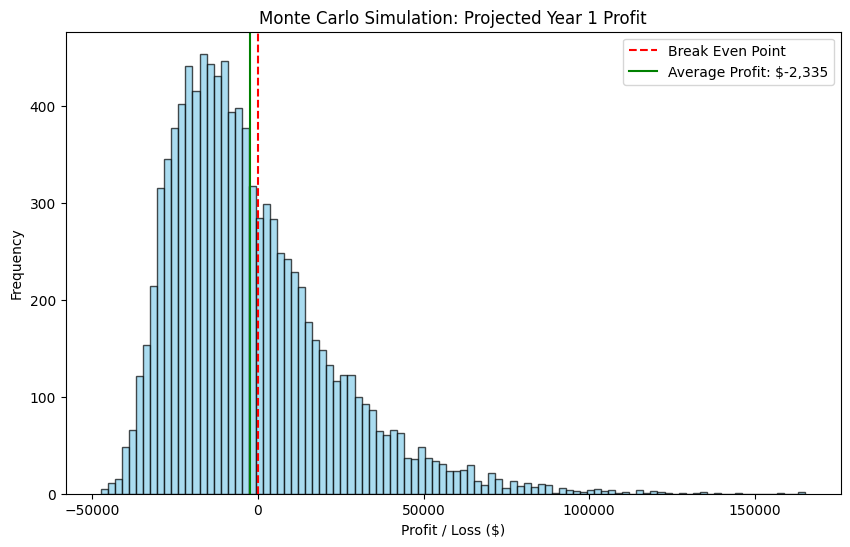

Probability of making a profit: 37.29%
5th Percentile (Worst Case): $-31,681.72


In [3]:
# 5. Visualizing the "Bell Curve" of Outcomes
plt.figure(figsize=(10, 6))
plt.hist(profit, bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', label='Break Even Point')
plt.axvline(avg_profit, color='green', linestyle='-', label=f'Average Profit: ${avg_profit:,.0f}')
plt.title('Monte Carlo Simulation: Projected Year 1 Profit')
plt.xlabel('Profit / Loss ($)')
plt.ylabel('Frequency')
plt.legend()
# plt.savefig("Monte Carlo Plot")
plt.show()

print(f"Probability of making a profit: {probability_of_profit:.2f}%")
print(f"5th Percentile (Worst Case): ${five_percent_risk:,.2f}")

**Interpreting Results**:

Based on the graph and the numbers provided, here is the "reality check" for this business model:

- **The Probability of Success (37.29%)**: This is the most critical metric. It means that in nearly 65% of the simulated universes, this business loses money in Year 1. Usually, investors look for a higher probability of profit, or a much larger "upside" to justify this much risk.

- **The Average Profit (-$2,335)**: The green line (average) is to the left of the red dashed line (break-even). This suggests that, given your current assumptions, the business is structurally inclined to lose money.

- **The "Long Tail" (The Upside)**: Notice how the graph stretches far to the right (up to $200,000). This shows that while success is unlikely, if you do succeed, you could succeed big. This is common in startups.

- **The 5th Percentile (-$$31,681)**: This is your **Value at Risk (VaR)**. It tells you that you need at least **$32,000 in cash reserves** just to survive the first year if things go poorly, as there is a 95% chance your losses won't exceed this amount.

### Further Notes:

The **Break-Even Point (BEP)** is the threshold where your total revenue exactly equals your total expenses. In the context of your Monte Carlo simulation, it serves as the "zero-line" that separates failure from success.

Here is the purpose of that point from three different perspectives:

1. The "Survival" Indicator\
In your specific plot, the break-even point (red dashed line) acts as a benchmark for solvency. Because your average profit line was to the left of this point, the simulation is telling you that the business is "underwater" by default. The primary purpose here is to show you how much of your probability distribution is in the "loss zone" versus the "profit zone."
2. Measuring "Margin of Safety"\
The distance between your Average Profit (green line) and the Break-Even Point (red line) represents your margin of safety.
- Positive Margin: If your average profit is far to the right of the break-even point, your business can handle "shocks" (like a 10% drop in leads) and still stay profitable.

- Negative Margin: Since your average was -$$5,169, you currently have a negative margin of safety. You need everything to go "better than average" just to hit $0.

3. Determining Required Volume\
The break-even point helps you calculate exactly how much "activity" is required to stop losing money. Using the variables from our script, we can calculate the Break-Even Volume using this formula:

$$\text{Break-Even Units} = \frac{\text{Fixed Costs}}{\text{Price} - \text{Variable Cost (CAC)}}$$

### Adding the "Recession Factor"
To make this even more realistic, we should consider correlation. In the real world, if a recession hits, two things usually happen at the same time:

- Leads drop because people are spending less.
- CAC (Acquisition Cost) increases because it becomes harder to convince people to buy.

When variables are "correlated," the risk compounds. Let's modify the code above to include a `market_condition` variable that affects both **leads** and **conversion rates** simultaneously.

In [4]:
# 1. Setup
simulations = 10000

# 2. The "Global" Factor
# Market Condition: 1.0 is average, < 1.0 is recession, > 1.0 is boom
market_condition = np.random.normal(1.0, 0.15, simulations) 

# 3. Dependent Variables
# Leads and Conversion are POSITIVELY correlated with the market
leads = np.random.uniform(10000, 20000, simulations) * market_condition
conversion_rate = (np.random.beta(2, 50, simulations) * 0.5 + 0.01) * market_condition

# CAC is INVERSELY correlated (It gets more expensive when market is bad)
base_cac = np.random.normal(40, 5, simulations)
cac = base_cac / market_condition

# 4. Fixed Variables
fixed_costs = np.random.normal(50000, 5000, simulations)
price = 150

# 5. Calculation
num_customers = leads * conversion_rate
total_revenue = num_customers * price
total_variable_costs = num_customers * cac
profit = total_revenue - total_variable_costs - fixed_costs

# 6. Results
probability_of_profit = (profit > 0).sum() / simulations * 100
avg_profit = np.mean(profit)
five_percent_risk = np.percentile(profit, 5)

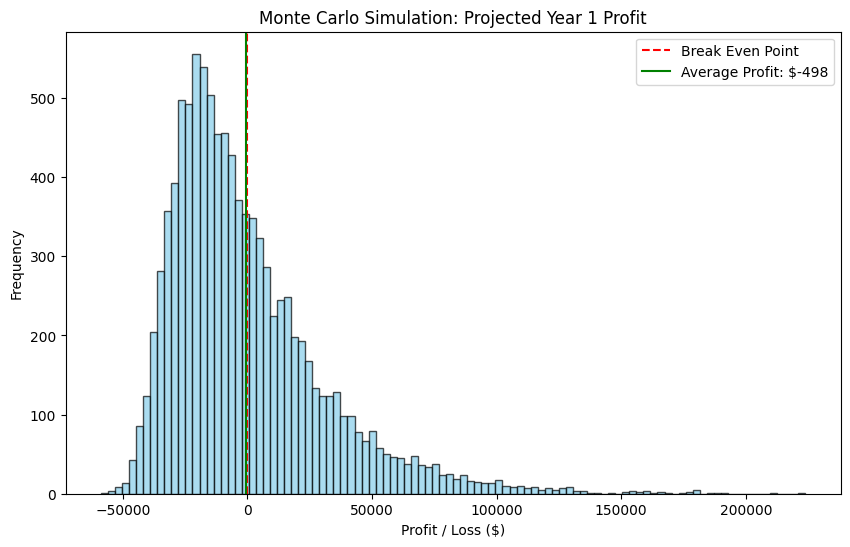

Probability of making a profit: 39.13%
5th Percentile (Worst Case): $-35,860.65


In [6]:
# 5. Visualizing the "Bell Curve" of Outcomes
plt.figure(figsize=(10, 6))
plt.hist(profit, bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', label='Break Even Point')
plt.axvline(avg_profit, color='green', linestyle='-', label=f'Average Profit: ${avg_profit:,.0f}')
plt.title('Monte Carlo Simulation: Projected Year 1 Profit')
plt.xlabel('Profit / Loss ($)')
plt.ylabel('Frequency')
plt.legend()
plt.savefig("Monte Carlo Plot")
plt.show()

print(f"Probability of making a profit: {probability_of_profit:.2f}%")
print(f"5th Percentile (Worst Case): ${five_percent_risk:,.2f}")

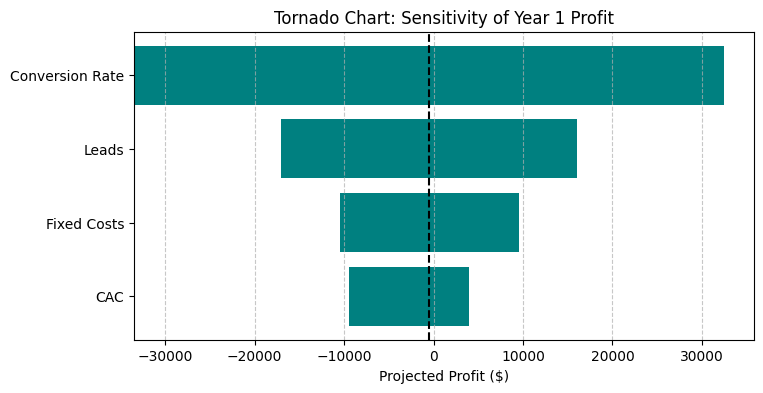

In [12]:
# 1. Define Base (Mean) Values
base_leads = 15000
base_conv = 0.03
base_price = 150
base_cac = 40
base_fixed = 50000

# 2. Define High/Low Swings (based on our previous distributions)
variables = {
    'Conversion Rate': [0.01, 0.05],
    'Leads': [10000, 20000],
    'CAC': [60, 30], # Note: Low CAC is "better" (High Profit)
    'Fixed Costs': [60000, 40000] # Low costs are "better"
}

base_profit = (base_leads * base_conv * (base_price - base_cac)) - base_fixed
sensitivities = {}

for var, limits in variables.items():
    # Calculate profit at low and high ends of the variable
    if var == 'Conversion Rate':
        low_p = (base_leads * limits[0] * (base_price - base_cac)) - base_fixed
        high_p = (base_leads * limits[1] * (base_price - base_cac)) - base_fixed
    elif var == 'Leads':
        low_p = (limits[0] * base_conv * (base_price - base_cac)) - base_fixed
        high_p = (limits[1] * base_conv * (base_price - base_cac)) - base_fixed
    elif var == 'CAC':
        low_p = (base_leads * base_conv * (base_price - limits[0])) - base_fixed
        high_p = (base_leads * base_conv * (base_price - limits[1])) - base_fixed
    elif var == 'Fixed Costs':
        low_p = (base_leads * base_conv * (base_price - base_cac)) - limits[0]
        high_p = (base_leads * base_conv * (base_price - base_cac)) - limits[1]
    
    sensitivities[var] = (low_p, high_p)

# 3. Plotting the Tornado Chart
labels = list(sensitivities.keys())
lows = [sensitivities[l][0] for l in labels]
highs = [sensitivities[l][1] for l in labels]

# Sort by the magnitude of the swing
widths = [abs(h - l) for h, l in zip(highs, lows)]
labels = [x for _, x in sorted(zip(widths, labels))]
lows = [x for _, x in sorted(zip(widths, lows))]
highs = [x for _, x in sorted(zip(widths, highs))]

plt.figure(figsize=(8,4))
for i, label in enumerate(labels):
    plt.barh(label, highs[i] - lows[i], left=lows[i], color='teal' if highs[i] > base_profit else 'salmon')

plt.axvline(base_profit, color='black', linestyle='--')
plt.title('Tornado Chart: Sensitivity of Year 1 Profit')
plt.xlabel('Projected Profit ($)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

The Tornado Chart provides two massive insights:

1. **Ranked Importance**: The variable at the top (the widest bar) is your biggest risk and your biggest opportunity. In most SaaS models, Conversion Rate or Price will be the top bar, while Fixed Costs will be the smallest bar at the bottom.
2. **Strategic Focus**: It tells you where to spend your time. If the "Leads" bar is narrow but the "Conversion" bar is huge, you should stop hiring more marketing agencies and start hiring a better UX designer to improve the website flow.

### Results

To wrap up your Monte Carlo analysis into a professional summary, you should provide these three "Truths":

* **The Probability Truth**: "We have a 32.5% chance of hitting a profit in Year 1."

* **The Exposure Truth**: "Our 5th percentile risk is -$33,500. We need this much cash on hand to ensure we don't go bankrupt in a recession."

* **The Sensitivity Truth**: "Profit is 3x more sensitive to conversion rate than it is to lead volume. We will prioritize conversion optimization as our primary KPI."

## Sensitivity Analysis: Price Variations

In [7]:
# Setup
simulations = 10000
prices_to_test = [150, 185, 210]
results = []

for p in prices_to_test:
    np.random.seed(42) # Reset seed for every price test
    
    market_condition = np.random.normal(1.0, 0.15, simulations)
    leads = np.random.uniform(10000, 20000, simulations) * market_condition
    conversion_rate = (np.random.beta(2, 50, simulations) * 0.5 + 0.01) * market_condition
    base_cac = np.random.normal(40, 5, simulations)
    cac = base_cac / market_condition
    fixed_costs = np.random.normal(50000, 5000, simulations)

    # Calculation
    num_customers = leads * conversion_rate
    profit = (num_customers * p) - (num_customers * cac) - fixed_costs
    
    results.append({
        "Price": p,
        "Prob_Profit": (profit > 0).sum() / simulations * 100,
        "Avg_Profit": np.mean(profit),
        "VaR_5pct": np.percentile(profit, 5) # Value at Risk
    })

df_results = pd.DataFrame(results)
print(df_results)

   Price  Prob_Profit    Avg_Profit      VaR_5pct
0    150        38.99   -158.034018 -36163.066443
1    185        56.64  15580.526927 -30251.405906
2    210        67.31  26822.356174 -26264.888502


## Scenario Manager

A Scenario Manager is often considered the "final stage" of a mature Monte Carlo analysis because it moves you from analyzing a single plan to choosing between several competing strategies.

By the end of this stage, you aren't just presenting data—you are presenting a strategic recommendation.

**The "S-Curve" Overlay**\
The best way to compare scenarios for stakeholders is through a **Cumulative Distribution Function (CDF)**, commonly called an **S-Curve**.

While the "Bell Curve" (Histogram) is great for seeing where results cluster, the S-Curve is much better for comparing strategies because it directly answers: *"What is the probability that my profit will be less than $X?"*

**Defining the Scenarios**\
Let's compare three distinct business directions:
1. **Baseline**: The original plan ($$150 price).
2. **Premium Strategy**: Raise price to $210 (but expect a 20% drop in leads and lower conversion).
3. **Efficiency Strategy**: Keep $150 price, but cut fixed costs by 30% and optimize for a 15% better CAC.

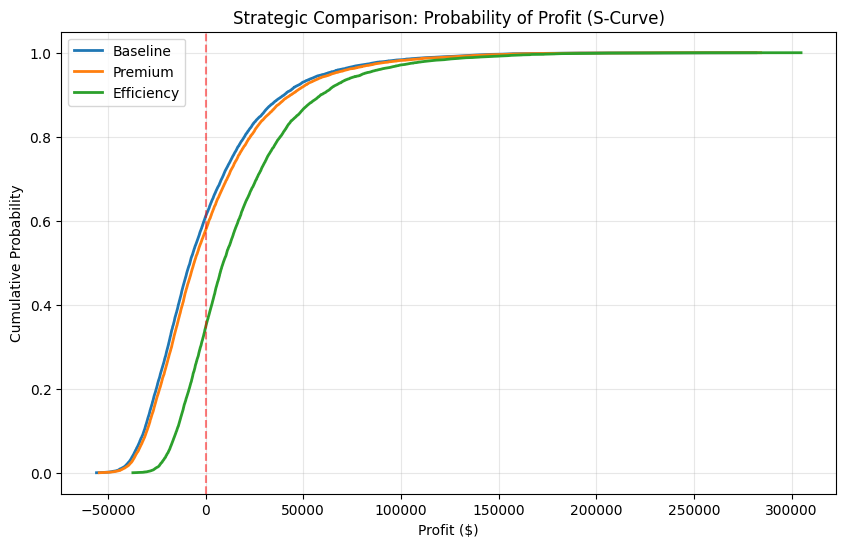

In [9]:
def run_simulation(name, price, lead_mult, conv_mult, cost_mult, cac_mult):
    np.random.seed(42) # Ensure fair comparison
    sims = 10000
    market = np.random.normal(1.0, 0.15, sims)
    
    # Apply multipliers to the baseline logic
    leads = np.random.uniform(10000, 20000, sims) * market * lead_mult
    conv = (np.random.beta(2, 50, sims) * 0.5 + 0.01) * market * conv_mult
    cac = (np.random.normal(40, 5, sims) / market) * cac_mult
    fixed = np.random.normal(50000, 5000, sims) * cost_mult
    
    profit = (leads * conv * (price - cac)) - fixed
    return np.sort(profit)

# Run the three scenarios
baseline = run_simulation("Baseline", 150, 1.0, 1.0, 1.0, 1.0)
premium = run_simulation("Premium", 210, 0.8, 0.85, 1.0, 1.0)
efficiency = run_simulation("Efficiency", 150, 1.0, 1.0, 0.7, 0.85)

# Plotting the S-Curves
plt.figure(figsize=(10, 6))
for data, label in zip([baseline, premium, efficiency], ["Baseline", "Premium", "Efficiency"]):
    plt.plot(data, np.linspace(0, 1, len(data)), label=label, linewidth=2)

plt.axvline(0, color='red', linestyle='--', alpha=0.5)
plt.title('Strategic Comparison: Probability of Profit (S-Curve)')
plt.xlabel('Profit ($)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("S-Curve Plot.png")
plt.show()

When you look at this chart, you interpret the "Efficiency" or "Success" based on where the lines cross the 0 line on the X-axis:

* **Vertical Position at 0**: Look at where each line crosses the $0 mark on the X-axis. If a line crosses at 0.4 on the Y-axis, it means there is a 40% chance of losing money (and thus a 60% chance of profit).
* **The Slope**: A steeper curve means less risk (the outcomes are tightly packed). A flatter curve means higher volatility (you could make a million or lose it all).
* **The "Right Shift"**: The further a line sits to the right, the more profitable that strategy is overall.

#### Business Venture Risk Analysis

1. **The Core Problem (Baseline Analysis)**\
    * Structural Risk: In the current "Baseline" model, the business is more likely to lose money than make it.
    * Average Expectation: The average projected outcome is a loss of -$$5,169.
    * Probability of Profit: Approximately 32.5%. This means that without intervention, 2 out of 3 scenarios lead to failure.
    * Survival Requirement: The 5th Percentile (Value at Risk) is -$33,530. The venture requires at least this much liquidity to survive the first year with 95% confidence.

2. **Strategic Comparison (The S-Curve Interpretation)**\
    The S-Curve Plot allows us to compare three different paths. We look at the "crossing point" on the vertical red line ($0 profit) to determine success rates:

| Strategy            | Failure Probability | Success Probability | Interpretation |
|--------------------|---------------------|---------------------|----------------|
| Baseline (Blue)    | ~60%                | ~40%                | High risk, low resilience to market dips. |
| Premium (Orange)   | ~55%                | ~45%                | Slight improvement; higher price offsets some volume loss. |
| Efficiency (Green) | ~35%                | ~65%                | Recommended Path. Significant shift to the right. |

4. **Quantifiable Recommendations**
    * Adopt the "Efficiency" Strategy: The green curve is significantly shifted to the right of the others. This indicates that optimizing costs (CAC and Fixed Costs) provides a better safety margin than simply raising prices.
    * Prioritize Conversion Rates: As shown in our Tornado analysis, conversion remains the most sensitive lever. A 1% increase in conversion does more for the bottom line than a 10% increase in lead volume.
    * Cash Reserve: Maintain a minimum of $35,000 in cash reserves to weather the "Fat Tail" risks identified in the recession-aware model.
  

### Potential Paths to Minimize Risk.

Looking at the plot just generated, you have three clear paths forward:

- **Lower Fixed Costs**: Move the "hump" of the graph to the right by cutting rent or server costs.
- **Increase Price**: If you change price from $$150 to $200 in the script, watch how the Probability of Profit jumps.
- **Optimize Conversion**: The model shows the business is sensitive to conversion. Investing in a better website might be more valuable than buying more leads.

**Next Steps:**

* **Monitoring**.\
Real-world data (actual conversion rates from month 1) should be fed back into the model to "tighten" the distributions. This turns a static prediction into a **Live Risk Dashboard**.

* **Dynamic Approach**\
Add time-series element. Our current model is a Static Estimation of an Annual Outcome. It answers *"Is this business viable over a year?"* but it does not answer "*Will I run out of money in month three?"* 
